# DNN: analysis with Keras of 2D data

In [79]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

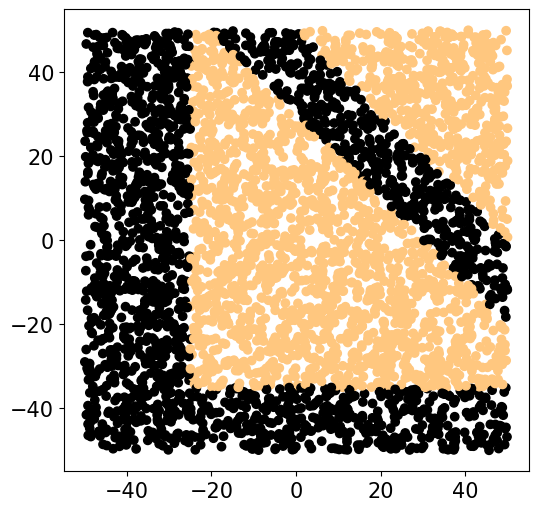

In [80]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [60]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [61]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow + Optimization method and cost function

In [62]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)


def create_model(activation='relu',optimizer=keras.optimizers.Adam()):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model
    

In [63]:
model_DNN = create_model()

print(model_DNN.summary())

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_315 (Dense)           (None, 2)                 6         
                                                                 
 dense_316 (Dense)           (None, 20)                60        
                                                                 
 dense_317 (Dense)           (None, 20)                420       
                                                                 
 dense_318 (Dense)           (None, 20)                420       
                                                                 
 dropout_63 (Dropout)        (None, 20)                0         
                                                                 
 dense_319 (Dense)           (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable

### Training

In [64]:
fit = model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6793 - accuracy: 0.6044 - val_loss: 0.6527 - val_accuracy: 0.6625 - 843ms/epoch - 13ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6092 - accuracy: 0.6772 - val_loss: 0.5679 - val_accuracy: 0.6862 - 144ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5429 - accuracy: 0.7072 - val_loss: 0.5339 - val_accuracy: 0.7375 - 136ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5173 - accuracy: 0.7341 - val_loss: 0.5090 - val_accuracy: 0.7487 - 141ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5013 - accuracy: 0.7459 - val_loss: 0.4925 - val_accuracy: 0.7500 - 138ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4906 - accuracy: 0.7497 - val_loss: 0.4816 - val_accuracy: 0.7563 - 143ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4823 - accuracy: 0.7531 - val_loss: 0.4759 - val_accuracy: 0.7613 - 159ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4774 - accuracy: 0.7553 - val_loss: 0.4659 - val_accuracy: 0.7625 - 122ms/epoch - 2ms/step
Epoch 9

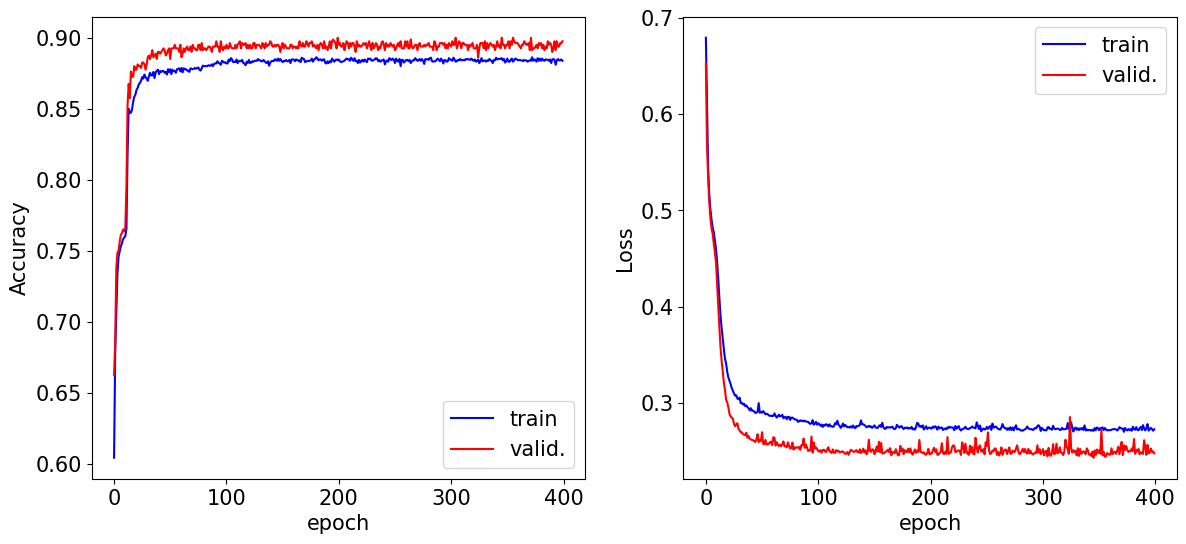

In [65]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [66]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50
#print(grid)
print(np.size(grid_r))
pred = model_DNN.predict(grid_r)

51 2601
[50. 50.]
5202
82/82 [==============================] - 0s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

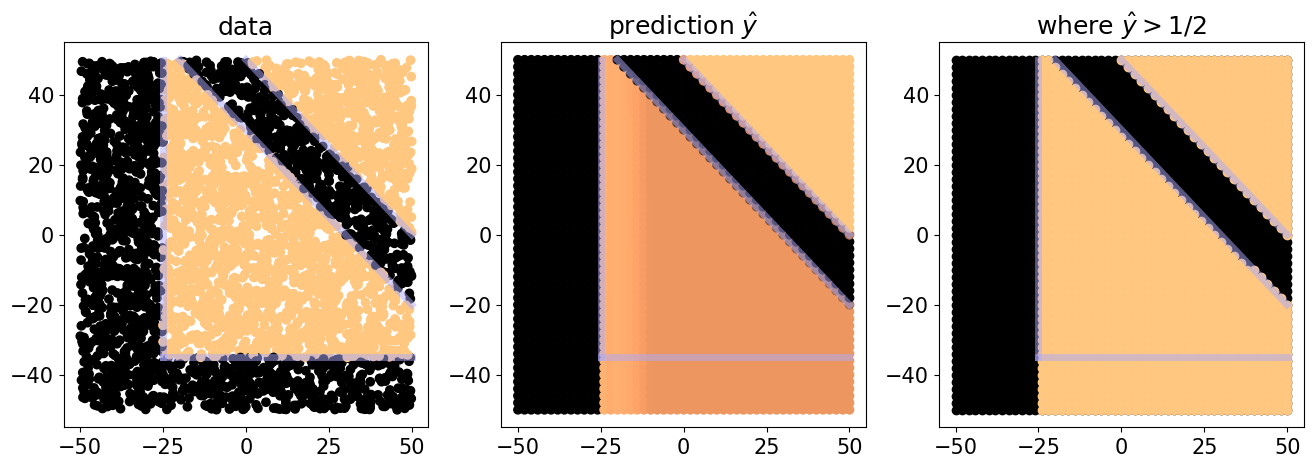

In [67]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## Optimization

Grid search to find the best minimization algorithm:

In [68]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
    
    
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_model, 
                        epochs=1, 
                        batch_size=50, 
                        verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/tmp/ipykernel_109/1622468043.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=create_model,


64/64 [==============================] - 1s 2ms/step - loss: 0.6755 - accuracy: 0.6759
Best: 0.644062 using {'optimizer': 'Adam'}
0.606562 (0.066205) with: {'optimizer': 'SGD'}
0.566250 (0.075016) with: {'optimizer': 'RMSprop'}
0.537187 (0.106005) with: {'optimizer': 'Adagrad'}
0.518438 (0.016803) with: {'optimizer': 'Adadelta'}
0.644062 (0.039778) with: {'optimizer': 'Adam'}
0.631563 (0.040189) with: {'optimizer': 'Adamax'}
0.637188 (0.016163) with: {'optimizer': 'Nadam'}


Grid search to find the best activation function:

In [69]:
model = create_model()
model.compile()
model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model_activation, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_109/698850419.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


64/64 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7081
Best: 0.705010 using {'activation': 'softsign'}
0.517495 (0.013583) with: {'activation': 'softmax'}
0.628455 (0.067067) with: {'activation': 'softplus'}
0.705010 (0.025690) with: {'activation': 'softsign'}
0.689080 (0.039844) with: {'activation': 'relu'}
0.669072 (0.021202) with: {'activation': 'tanh'}
0.517495 (0.013583) with: {'activation': 'sigmoid'}
0.517495 (0.013583) with: {'activation': 'hard_sigmoid'}
0.655013 (0.029887) with: {'activation': 'linear'}


In [70]:
print(f'The best parameters are:{grid_result.best_params_},\nwhith a score of {grid_result.best_score_}')

The best parameters are:{'activation': 'softsign'},
whith a score of 0.7050103942553202


## C)AUGMENTATION
To augmenting our data try to put some noise in our data to augment them because it works like shifting them. For this reason we applied a noise between(-0.02, +0.02)

In [71]:

(x_train, y_train) = (x[0:N_train],y[0:N_train])  
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Our data at the begining:")
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_aug = x_train + np.random.uniform(-0.02, 0.02, size=x_train.shape)
y_aug = np.copy(y_train)

x_train = np.vstack((x_train, x_aug)) #.vstack use to have vertical stack
y_train = np.hstack((y_train, y_aug)) #.hstack use to have horizental stack
print('After augmentation')
print("Train:",len(x_train),"\t Validation:",len(x_valid))


Our data at the begining:
Train: 3200 	 Validation: 800
After augmentation
Train: 6400 	 Validation: 800


In [72]:
#use rescale function like before
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [74]:
#### optimization
#(activation='relu',optimizer=keras.optimizers.Adam())
#def compile_model(optimizer='adam', act_func='relu', neurons=30):
#    model = create_DNN(act_func, neurons)
#    model.compile(loss='binary_crossentropy',
#                  optimizer=optimizer,
#                  metrics=['accuracy'])    
#    return model
nepochs=400
model_augmented = create_model(activation='relu',optimizer=grid_result.best_params_)

history_augmented = model_augmented.fit(x_train, y_train,
                                      epochs = 400,
                                      batch_size = grid_result,
                                      validation_data=(x_valid,y_valid),
                                      verbose=2)

ValueError: Unknown optimizer: 'softsign'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

NameError: name 'history_augmented' is not defined

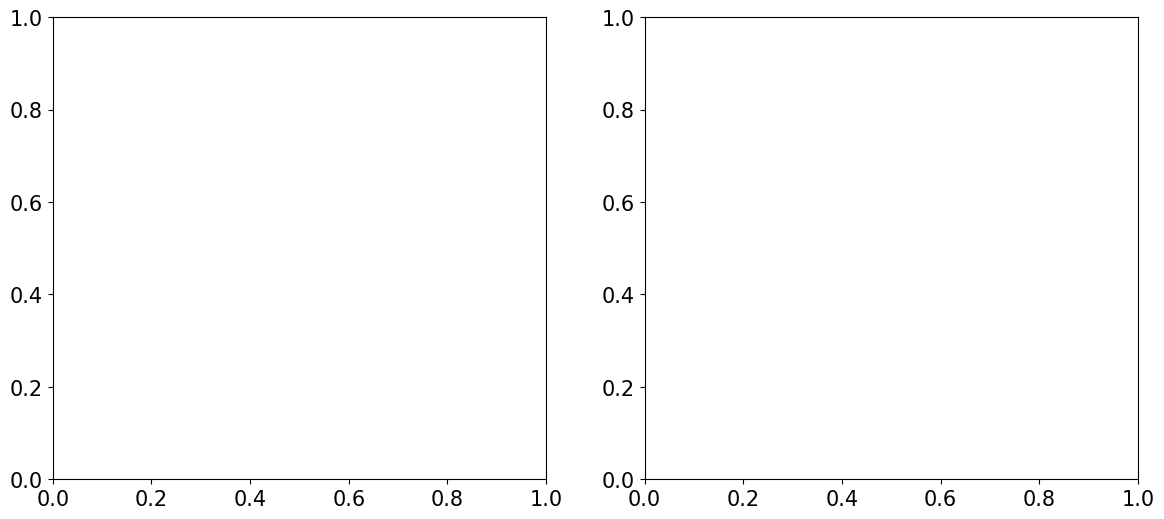

In [76]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_augmented.history['accuracy'],label="train",c="b")
ax.plot(history_augmented.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_augmented.history['loss'],label="train",c="b")
ax.plot(history_augmented.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

51 2601
[50. 50.]
82/82 [==============================] - 0s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

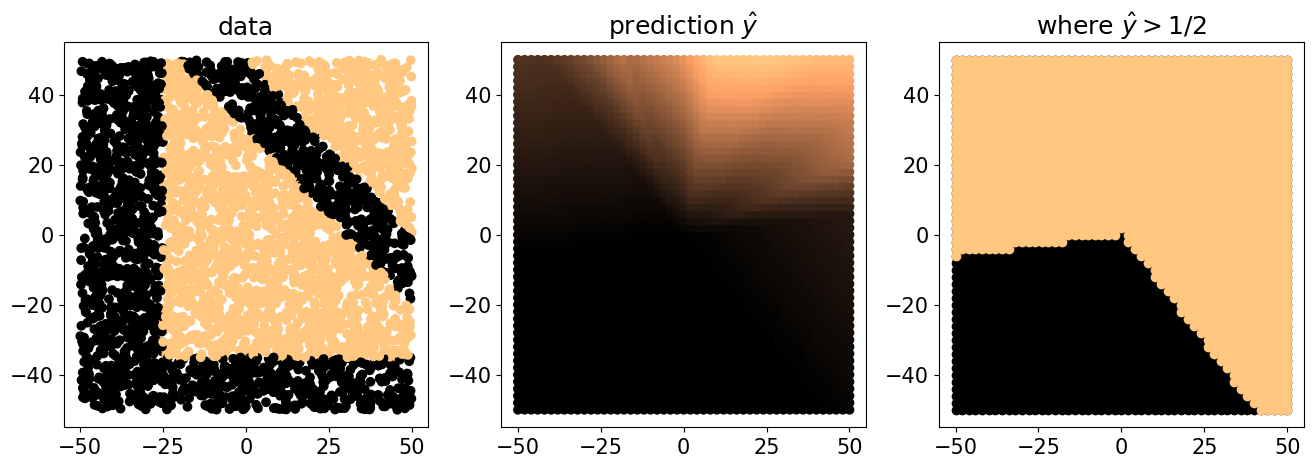

In [77]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_augmented.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

##### Why do not we also augment the validation samples? #####
Validation sample is a sample of data held back from training our model that is used to give an estimate of model skill while tuning model's hyperparameters. Also, it help us to know that our model workes efficient or not.
If the validation set is augmented, it would be impossible to know whether the improvement in performance is due to the model's ability to generalize to new data or simply due to the fact that the model has already seen the augmented data during training. In addition, the validation set should be representative of the real-world data that the model will be applied to, and augmenting it could result in an unrealistic evaluation of the model's performance. If we augment our validation samples too, it is like that we put some noise in it. As a result, our cost function(loss function) would be increae. In addition, our model may be overfit or underfit.

## Ex. 3

In [86]:
import matplotlib.cm as cm
# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA2

mkdir: cannot create directory ‘DATA2’: File exists


2 5 1
./DATA/data-for-DNN-2.dat
./DATA/labels-for-DNN-2.dat


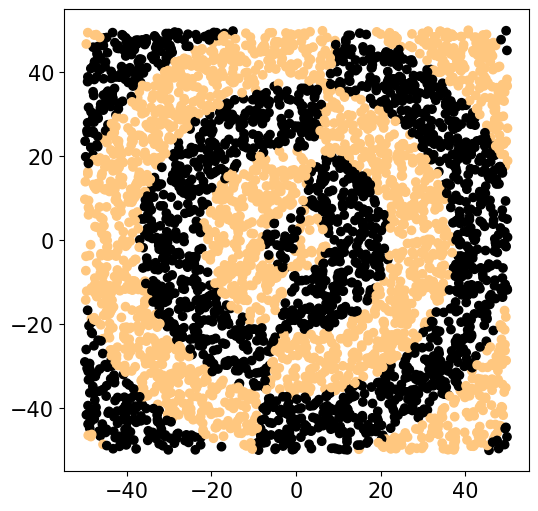

In [87]:
TYPE=2

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap=cm.copper)
plt.show

fn=filename("data",TYPE)
np.savetxt(fn,x)
print(fn)
fn=filename("labels",TYPE)
np.savetxt(fn,y,fmt="%d")
print(fn)

In [88]:
# Split training and test data
(x_train, y_train) = (x[0:N_train],y[0:N_train]) 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [93]:
def Rescale(x):
    return x/50 #the number goes from -50 to 50, so we put them between -1 and 1 to use the non linearity 

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [94]:
def create_DNN(act_func, neurons): 
    model = Sequential() #empty template of the neural network
    model.add(Dense(L,input_shape=(L,),activation=act_func)) #add a layer dense (all connection) with a ReLu 2 neuron for 2 x_i
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dropout(0.01)) #it is applied to the last layer, need to be reader in keras documentation 
    model.add(Dense(1,activation='sigmoid'))

    return model 

In [95]:
def compile_model(optimizer='adam', act_func='relu', neurons=20):
    model = create_DNN(act_func, neurons)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])    
    return model

model_nonlinear = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func='ReLU',
                              neurons=grid_result.best_params_['model__neurons'])

nepoch=400
history_nonlinear = model_nonlinear.fit(x_train, y_train,
               epochs = nepoch, batch_size = grid_result.best_params_['batch_size'],
               validation_data=(x_valid,y_valid),
               verbose=1)

KeyError: 'model__neurons'

NameError: name 'history_nonlinear' is not defined

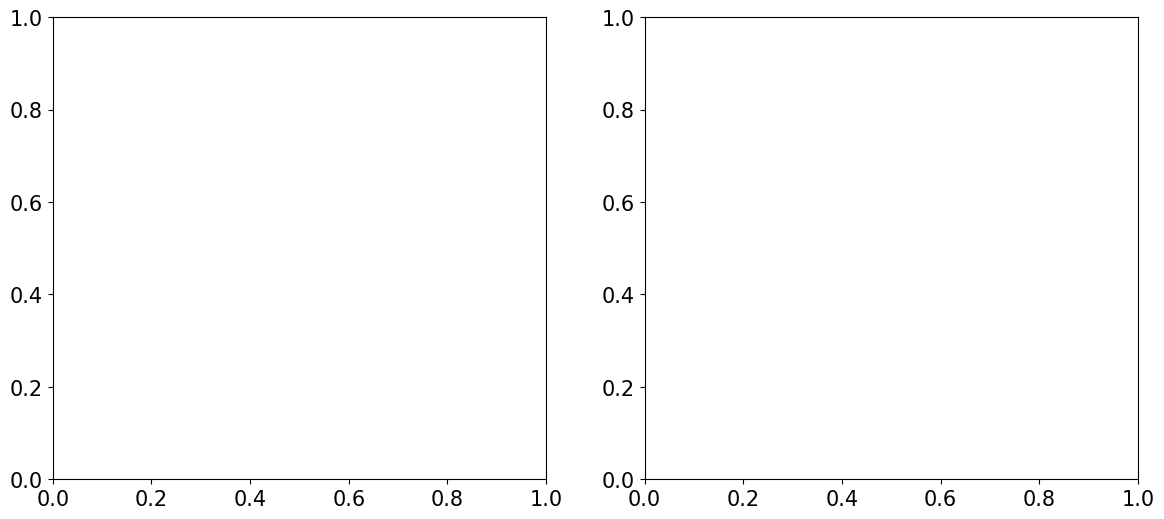

In [96]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_nonlinear.history['accuracy'],label="train",c="b")
ax.plot(history_nonlinear.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_nonlinear.history['loss'],label="train",c="b")
ax.plot(history_nonlinear.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [97]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_nonlinear.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")

plt.show
plt.show

51 2601
[50. 50.]


NameError: name 'model_nonlinear' is not defined

### ###

If a second nonlinear function is applied to a dataset, the resulting data may have different statistical properties than the original dataset. This could affect the performance of the model and may require the use of a different architecture or hyperparameters to achieve optimal performance.Similarly, if a different nonlinear function is used in the model than the one used in the original dataset, the model may have a different capacity to learn complex patterns in the data. This could result in better or worse performance depending on the specific properties of the data and the choice of nonlinear function. It may be necessary to experiment with different nonlinear functions to determine the best approach for a given data.